# Coronavirus France Cases Predictions with Linear Regression

In [1]:
### import libraries
import pandas as pd #Dataframe manipulation library
import numpy as np #Library to handle data in a vectorized manner
import matplotlib.pyplot as plt #Matplotlib and associated plotting modules
import matplotlib.colors as mcolors
import matplotlib as mpl
from matplotlib import style
import math #Math functions
import requests #library to handle requests
import os
import random
import time
import datetime
import warnings
print('Libraries imported.')

Libraries imported.


In [2]:
warnings.filterwarnings("ignore")

In [3]:
###Import the data from CSSE at Johns Hopkins University (https://systems.jhu.edu/)
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [4]:
confirmed_df.drop(['1/22/20', '1/23/20'], axis=1, inplace=True)
deaths_df.drop(['1/22/20', '1/23/20'], axis=1, inplace=True)
recoveries_df.drop(['1/22/20', '1/23/20'], axis=1, inplace=True)

In [5]:
cols = confirmed_df.keys()

In [6]:
###Get all the dates for the outbreak
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]

In [7]:
confirmed_df = confirmed_df[confirmed_df['Country/Region']=='France']
deaths_df = deaths_df[deaths_df['Country/Region']=='France']
recoveries_df = recoveries_df[recoveries_df['Country/Region']=='France']

In [8]:
dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
active_cases = []
mean_mortality_rate = []
mean_mortality_rate = []

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)
    total_recovered.append(recovered_sum)
    active_cases.append(confirmed_sum-(recovered_sum+death_sum))
    active_cases_sum=(confirmed_sum-(recovered_sum+death_sum)).sum()
    mean_recovery_rate = np.mean(recovery_rate)
    mean_mortality_rate = np.mean(mortality_rate)

In [9]:
###Convert integer into datetime for better visualization
start = '1/24/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')

In [10]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)
active_cases = np.array(active_cases).reshape(-1, 1)

In [11]:
###Future forecast
days_in_future = 3
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))
adjusted_dates = future_forcast_dates[:-3]

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [13]:
# Train parameters to predict labels, use 10% for Test set
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.1, shuffle=False) 
X_train_recovered, X_test_recovered, y_train_recovered, y_test_recovered = train_test_split(days_since_1_22, total_recovered, test_size=0.1, shuffle=False)
X_train_deaths, X_test_deaths, y_train_deaths, y_test_deaths = train_test_split(days_since_1_22, total_deaths, test_size=0.1, shuffle=False)
X_train_active, X_test_active, y_train_active, y_test_active = train_test_split(days_since_1_22, active_cases, test_size=0.1, shuffle=False) 
X_train_mortality, X_test_mortality, y_train_mortality, y_test_mortality = train_test_split(days_since_1_22, mortality_rate , test_size=0.1, shuffle=False) 
X_train_recovery, X_test_recovery, y_train_recovery, y_test_recovery = train_test_split(days_since_1_22, recovery_rate, test_size=0.1, shuffle=False) 

In [14]:
linear_model = LinearRegression(fit_intercept=False, normalize=True)

In [15]:
linear_model.fit(X_train_confirmed, y_train_confirmed)
test_linear_pred_confirmed = linear_model.predict(X_test_confirmed)
linear_pred_confirmed = linear_model.predict(future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred_confirmed, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred_confirmed, y_test_confirmed))

MAE: 726183.4933419634
MSE: 558666402867.9192


In [16]:
linear_model.fit(X_train_active, y_train_active)
test_linear_pred_active = linear_model.predict(X_test_active)
linear_pred_active = linear_model.predict(future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred_active, y_test_active))
print('MSE:',mean_squared_error(test_linear_pred_active, y_test_active))

MAE: 567574.126540063
MSE: 339325434604.6443


In [17]:
linear_model.fit(X_train_recovered, y_train_recovered)
test_linear_pred_recovered = linear_model.predict(X_test_recovered)
linear_pred_recovered = linear_model.predict(future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred_recovered, y_test_recovered))
print('MSE:',mean_squared_error(test_linear_pred_recovered, y_test_recovered))

MAE: 116714.84807425398
MSE: 14775987411.423595


In [18]:
linear_model.fit(X_train_deaths, y_train_deaths)
test_linear_pred_deaths = linear_model.predict(X_test_deaths)
linear_pred_deaths = linear_model.predict(future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred_deaths, y_test_deaths))
print('MSE:',mean_squared_error(test_linear_pred_deaths, y_test_deaths))

MAE: 41894.5187276464
MSE: 1897829547.308011


In [19]:
linear_model.fit(X_train_mortality, y_train_mortality)
test_linear_pred_mortality = linear_model.predict(X_test_mortality)
linear_pred_mortality = linear_model.predict(future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred_mortality, y_test_mortality))
print('MSE:',mean_squared_error(test_linear_pred_mortality, y_test_mortality))

MAE: 0.005433552488924752
MSE: 3.0144807382178137e-05


In [20]:
linear_model.fit(X_train_recovery, y_train_recovery)
test_linear_pred_recovery = linear_model.predict(X_test_recovery)
linear_pred_recovery = linear_model.predict(future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred_recovery, y_test_recovery))
print('MSE:',mean_squared_error(test_linear_pred_recovery, y_test_recovery))

MAE: 0.3324862030017425
MSE: 0.11092007538503668


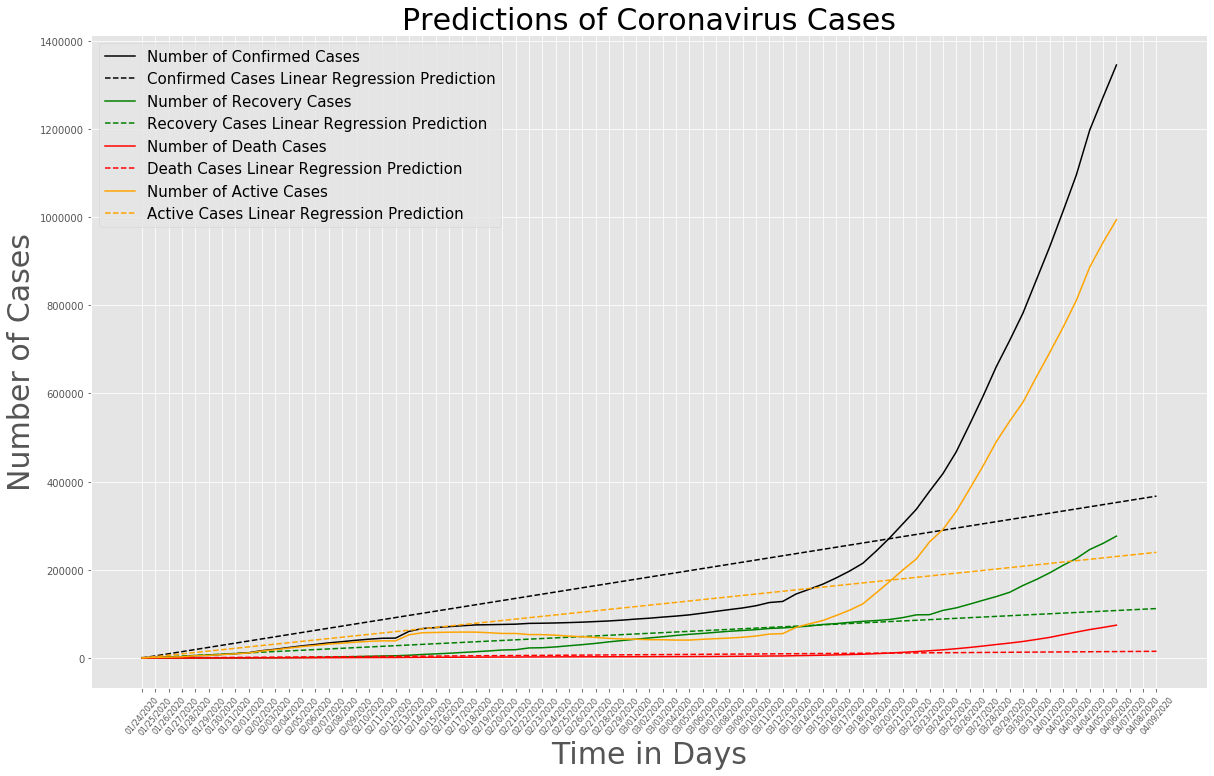

In [21]:
plt.style.use('ggplot')
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases, color='black')
plt.plot(future_forcast_dates, linear_pred_confirmed, linestyle='dashed', color='black')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.plot(future_forcast_dates, linear_pred_recovered, linestyle='dashed', color='green')
plt.plot(adjusted_dates, total_deaths, color='red')
plt.plot(future_forcast_dates, linear_pred_deaths, linestyle='dashed', color='red')
plt.plot(adjusted_dates, active_cases, color='orange')
plt.plot(future_forcast_dates, linear_pred_active, linestyle='dashed', color='orange')
plt.title('Predictions of Coronavirus Cases', size=30)
plt.legend(['Number of Confirmed Cases', 'Confirmed Cases Linear Regression Prediction',  'Number of Recovery Cases', 'Recovery Cases Linear Regression Prediction', 'Number of Death Cases', 'Death Cases Linear Regression Prediction', 'Number of Active Cases', 'Active Cases Linear Regression Prediction'], loc='upper left', fontsize=15)
plt.xlabel('Time in Days', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(rotation=50, size=8)
plt.show()

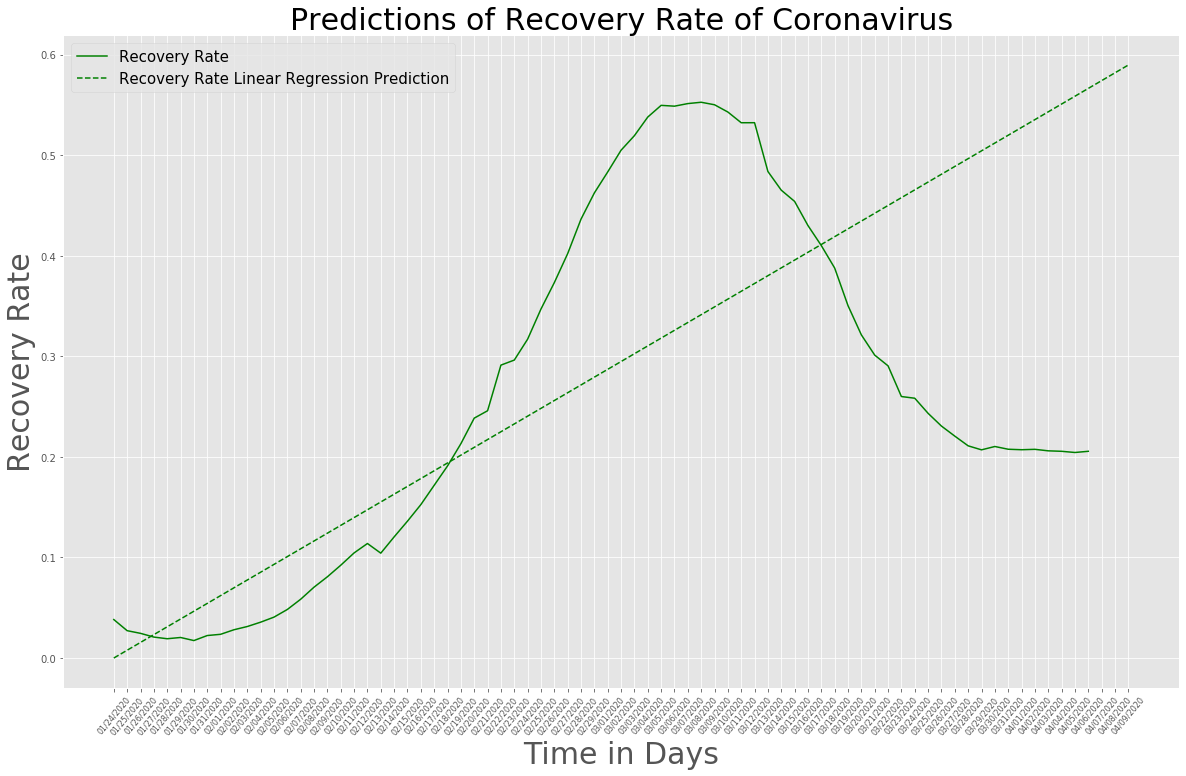

In [22]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, recovery_rate, color='green')
plt.plot(future_forcast_dates, linear_pred_recovery, linestyle='dashed', color='green')
plt.title('Predictions of Recovery Rate of Coronavirus', size=30)
plt.legend(['Recovery Rate', 'Recovery Rate Linear Regression Prediction', 'Recovery Rate SVM Prediction'], loc='upper left', fontsize=15)
plt.xlabel('Time in Days', size=30)
plt.ylabel('Recovery Rate', size=30)
plt.xticks(rotation=50, size=8)

plt.show()

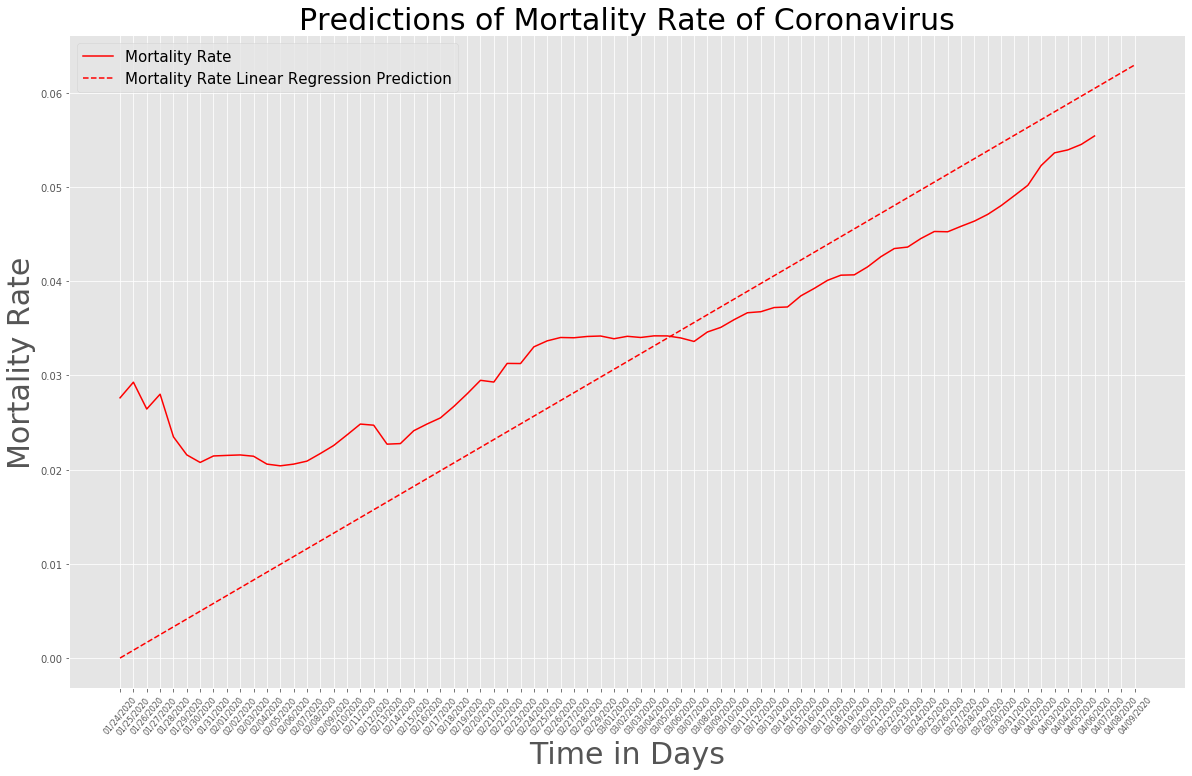

In [23]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, mortality_rate, color='red')
plt.plot(future_forcast_dates, linear_pred_mortality, linestyle='dashed', color='red')
plt.title('Predictions of Mortality Rate of Coronavirus', size=30)
plt.legend(['Mortality Rate', 'Mortality Rate Linear Regression Prediction'], loc='upper left', fontsize=15)
plt.xlabel('Time in Days', size=30)
plt.ylabel('Mortality Rate', size=30)
plt.xticks(rotation=50, size=8)
plt.show()